In [7]:
import py5_tools
import numpy as np

N = 16
FPS = 5

def setup():
#     global photo_start, photo_end
    global photo_list, indice_list
    
    size(100, 100)
    frame_rate(FPS)

    photo_start = load_image("../depart.gif")
    photo_start.load_np_pixels()    
    photo_end = load_image("../finale.gif")
    photo_end.load_np_pixels()
        
    photo_list = [photo_start]
    for i in range(1, N):
        photo_inter = ((N - i) / N * photo_start.np_pixels + (i / N ) * photo_end.np_pixels).astype(np.uint8)
        photo_list.append(create_image_from_numpy(photo_inter, 'ARGB'))
    photo_list.append(photo_end)
    
    # Increasing then decreasing list of indice
    # [0, 1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
    indice_list = list(range(len(photo_list) - 1))
    indice_list.extend(range(len(photo_list) - 1,0,-1))
        
    # Resize the window to the size of the image to be displayed
    window_resize(photo_start.width, photo_start.height)
    
#     no_loop()
    
def draw():    
    global indice_list
     
    image(photo_list[indice_list[frame_count % len(indice_list)]], 0, 0)
    
run_sketch()

py5_tools.animated_gif('./morphing.gif', count= 2*N, period=1/FPS, duration=1/FPS)

Output(layout=Layout(max_height='200px', overflow='auto'))

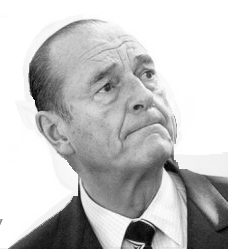